   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0  -0.023489   0.198078  -0.017453  -0.006613  -0.101909  -0.037711   
1  -0.078124   0.172256   0.034426   0.001847  -0.120847  -0.068377   
2  -0.129213   0.138056   0.077481   0.001475  -0.131304  -0.087772   
3  -0.166825   0.102920   0.098318  -0.008269  -0.130015  -0.096571   
4  -0.183610   0.072522   0.087221  -0.026295  -0.114900  -0.096324   

   Channel_7  Channel_8  Channel_9  Channel_10  Stimulus  
0   0.029349  -0.052670   0.077615    0.075996         0  
1   0.026618  -0.056334   0.125658    0.089863         0  
2   0.009211  -0.059509   0.153696    0.091816         0  
3  -0.027021  -0.066615   0.157365    0.070016         0  
4  -0.039687  -0.064432   0.138943    0.021894         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel_1   16782 non-n

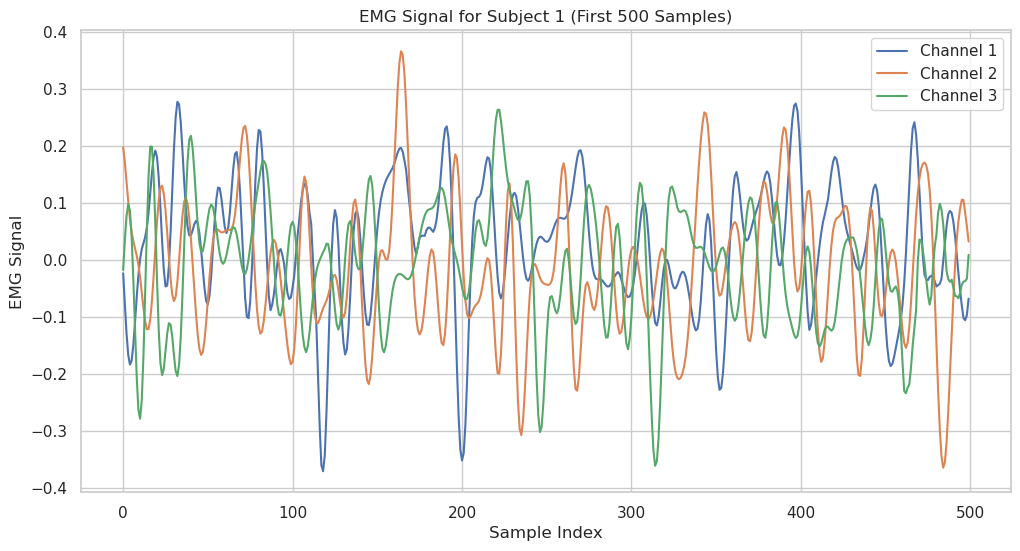

In [11]:
# Import libraries
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Function to load and convert .mat file into pandas DataFrame
def load_mat_to_df(filepath):
    data = scipy.io.loadmat(filepath)
    emg = data['emg']  # Extract EMG data
    stimulus = data['stimulus'].flatten()  # Extract stimulus labels (flatten to 1D array)
    
    # Create a DataFrame
    df = pd.DataFrame(emg, columns=[f'Channel_{i+1}' for i in range(emg.shape[1])])
    df['Stimulus'] = stimulus
    return df

# Load Subject 1's data
subject1_filepath = "subject_1.mat"  # Update with the actual path
subject1_df = load_mat_to_df(subject1_filepath)

# Check data structure
print(subject1_df.head())
print(subject1_df.info())

# Visualize a few channels over time
plt.figure(figsize=(12, 6))
plt.plot(subject1_df.index[:500], subject1_df.iloc[:500, 0], label="Channel 1")
plt.plot(subject1_df.index[:500], subject1_df.iloc[:500, 1], label="Channel 2")
plt.plot(subject1_df.index[:500], subject1_df.iloc[:500, 2], label="Channel 3")
plt.xlabel("Sample Index")
plt.ylabel("EMG Signal")
plt.title("EMG Signal for Subject 1 (First 500 Samples)")
plt.legend()
plt.show()


In [12]:
# Load Subject 1's data
subject2_filepath = "subject_2.mat"  # Update with the actual path
subject2_df = load_mat_to_df(subject2_filepath)

# Check data structure
print(subject2_df.head())
print(subject2_df.info())


   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0   0.027054  -0.076287  -0.058222   0.148054  -0.020103   0.003629   
1   0.030266  -0.060370  -0.055418   0.130650   0.019779  -0.003098   
2   0.031540  -0.062843  -0.065212   0.102853   0.061320  -0.018397   
3   0.030271  -0.081764  -0.090538   0.069528   0.094186  -0.038248   
4  -0.001542  -0.106352  -0.115518   0.035905   0.110237  -0.056386   

   Channel_7  Channel_8  Channel_9  Channel_10  Stimulus  
0  -0.084009  -0.011359  -0.084841   -0.057762         0  
1  -0.062383   0.001920  -0.101609   -0.053038         0  
2  -0.023044   0.004446  -0.105946   -0.024739         0  
3   0.035276   0.017802  -0.108747    0.012346         0  
4   0.096810  -0.000826  -0.113395    0.036293         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel_1   16784 non-n

In [13]:

subject3_filepath = "subject_3.mat"  # Update with the actual path
subject3_df = load_mat_to_df(subject3_filepath)

# Check data structure
print(subject3_df.head())
print(subject3_df.info())

   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0   0.011329  -0.181607   0.057493   0.137813  -0.162383   0.081804   
1  -0.033274  -0.138196   0.027751   0.094825  -0.063516   0.085232   
2  -0.064156  -0.086520   0.010155   0.040830   0.030951   0.091328   
3  -0.082563  -0.034357   0.005746  -0.015599   0.112229   0.100575   
4  -0.092800   0.009911   0.023699  -0.065567   0.167104   0.110795   

   Channel_7  Channel_8  Channel_9  Channel_10  Stimulus  
0  -0.044062   0.088367  -0.045371   -0.070256         0  
1  -0.031800  -0.001695  -0.069991   -0.076906         0  
2  -0.028043  -0.109452  -0.088950   -0.066816         0  
3  -0.017850  -0.207978  -0.101878   -0.044649         0  
4  -0.014278  -0.283997  -0.107655   -0.017287         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16749 entries, 0 to 16748
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel_1   16749 non-n

In [14]:
# Function to filter out rows where stimulus is 0
def filter_stimulus_zero(subject_df):
    return subject_df[subject_df['Stimulus'] != 0]

# Apply filtering to all subjects
subject1_df = filter_stimulus_zero(subject1_df)
subject2_df = filter_stimulus_zero(subject2_df)
subject3_df = filter_stimulus_zero(subject3_df)

print(subject1_df['Stimulus'].value_counts())
print(subject2_df['Stimulus'].value_counts())
print(subject3_df['Stimulus'].value_counts())

Stimulus
2    5167
1    5166
Name: count, dtype: int64
Stimulus
1    5174
2    5174
Name: count, dtype: int64
Stimulus
1    5167
2    5160
Name: count, dtype: int64


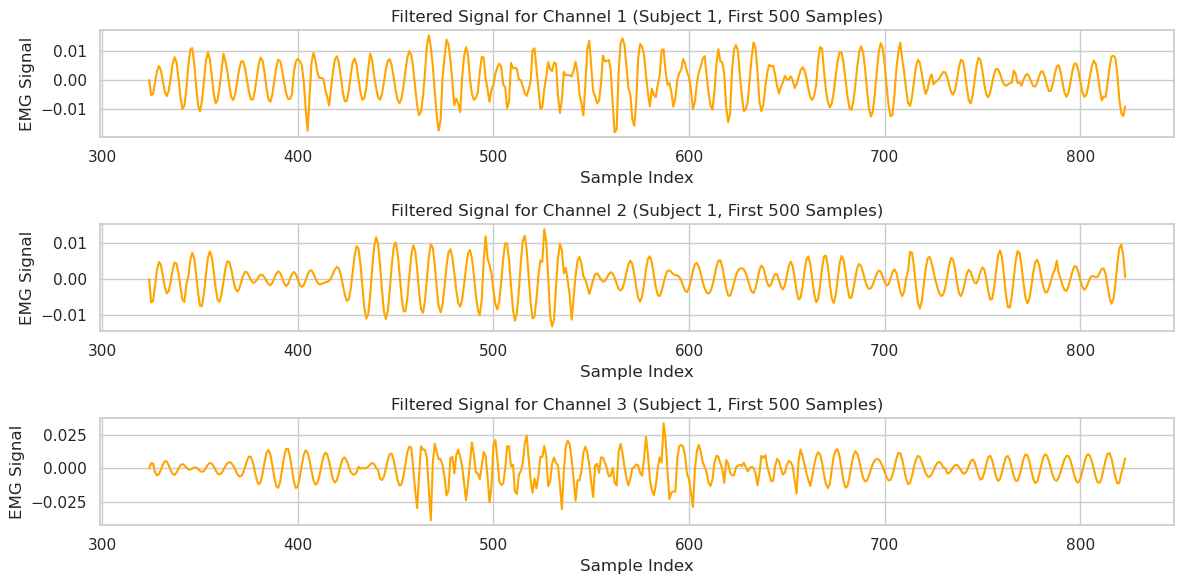

In [15]:
from scipy.signal import butter, filtfilt

# Function to create a high-pass Butterworth filter
def high_pass_filter(data, cutoff_freq, sample_rate, order=8):
    nyquist = 0.5 * sample_rate  # Nyquist frequency is half the sampling rate
    normal_cutoff = cutoff_freq / nyquist  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Apply high-pass filter to each subject's EMG data and keep the 'Stimulus' column
def apply_high_pass_filter_to_subject(subject_df, cutoff_freq, sample_rate):
    # Extract EMG channels (all columns except last one, which is 'Stimulus')
    emg_data = subject_df.iloc[:, :-1]
    # Apply high-pass filter to each channel
    filtered_data = emg_data.apply(lambda x: high_pass_filter(x, cutoff_freq, sample_rate))
    # Re-attach the 'Stimulus' column
    filtered_data['Stimulus'] = subject_df['Stimulus'].values
    return filtered_data

cutoff_frequency = 10  # Cutoff frequency in Hz
sample_rate = 100

# Filter data for all subjects
subject1_filtered = apply_high_pass_filter_to_subject(subject1_df, cutoff_frequency, sample_rate)
subject2_filtered = apply_high_pass_filter_to_subject(subject2_df, cutoff_frequency, sample_rate)
subject3_filtered = apply_high_pass_filter_to_subject(subject3_df, cutoff_frequency, sample_rate)

# Optionally, visualize the filtered signals for the first few samples of Subject 1
plt.figure(figsize=(12, 6))

# Visualize first 3 channels of Subject 1
for i in range(3):  # Show first 3 channels
    plt.subplot(3, 1, i+1)
    plt.plot(subject1_filtered.index[:500], subject1_filtered.iloc[:500, i], label=f"Filtered Channel {i+1}", color='orange')
    plt.title(f"Filtered Signal for Channel {i+1} (Subject 1, First 500 Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("EMG Signal")

plt.tight_layout()
plt.show()

# Now the filtered data for each subject includes the Stimulus column:
# subject1_filtered, subject2_filtered, subject3_filtered


In [16]:
import numpy as np

def apply_fft_to_signal(signal, sample_rate):
    """
    Computes the FFT of a 1D signal.
    
    Parameters:
    - signal: array-like, the time-domain signal.
    - sample_rate: int, the sampling rate of the signal in Hz.
    
    Returns:
    - freq: array, the frequencies corresponding to the FFT components.
    - magnitude: array, the magnitudes of the FFT components.
    """
    # Number of samples
    n_samples = len(signal)
    
    # Compute the FFT
    fft_values = np.fft.fft(signal)
    
    # Compute the frequencies corresponding to the FFT values
    freq = np.fft.fftfreq(n_samples, d=1/sample_rate)
    
    # Compute the magnitude of the FFT (absolute value)
    magnitude = np.abs(fft_values) / n_samples  # Normalize the magnitude
    
    # Return only the positive frequencies
    positive_freq_idx = freq >= 0
    return freq[positive_freq_idx], magnitude[positive_freq_idx]

def compute_fft_for_subject(subject_filtered_df, sample_rate=100):
    """
    Computes the FFT for each trial in the time-domain data and aligns the stimulus values.
    """
    # Extract channel names
    channels = [col for col in subject_filtered_df.columns if col.startswith('Channel')]
    
    # Group by stimulus or trial index if applicable
    trials = subject_filtered_df.groupby('Stimulus')  # Group by the stimulus value
    
    # Initialize list to store FFT results for all trials
    fft_results = []
    
    for stimulus_value, trial_data in trials:
        # Convert trial data to numpy array
        data = trial_data[channels].values
        num_samples, num_channels = data.shape
        
        # Compute freq and FFT magnitudes for this trial
        freq, fft_mag_first = apply_fft_to_signal(data[:, 0], sample_rate)
        fft_magnitudes_all = np.zeros((len(freq), num_channels))
        fft_magnitudes_all[:, 0] = fft_mag_first
        
        for ch_idx in range(1, num_channels):
            _, fft_mag = apply_fft_to_signal(data[:, ch_idx], sample_rate)
            fft_magnitudes_all[:, ch_idx] = fft_mag
        
        # Create DataFrame for this trial
        trial_fft = pd.DataFrame(fft_magnitudes_all, index=freq, columns=channels)
        trial_fft['Stimulus'] = stimulus_value  # Add the stimulus value to all rows
        
        # Append to results
        fft_results.append(trial_fft)
    
    # Concatenate all trial FFT DataFrames
    subject_fft = pd.concat(fft_results, ignore_index=True)
    
    return subject_fft


# Compute FFT for each subject
subject1_fft = compute_fft_for_subject(subject1_filtered, sample_rate=100)
subject2_fft = compute_fft_for_subject(subject2_filtered, sample_rate=100)
subject3_fft = compute_fft_for_subject(subject3_filtered, sample_rate=100)


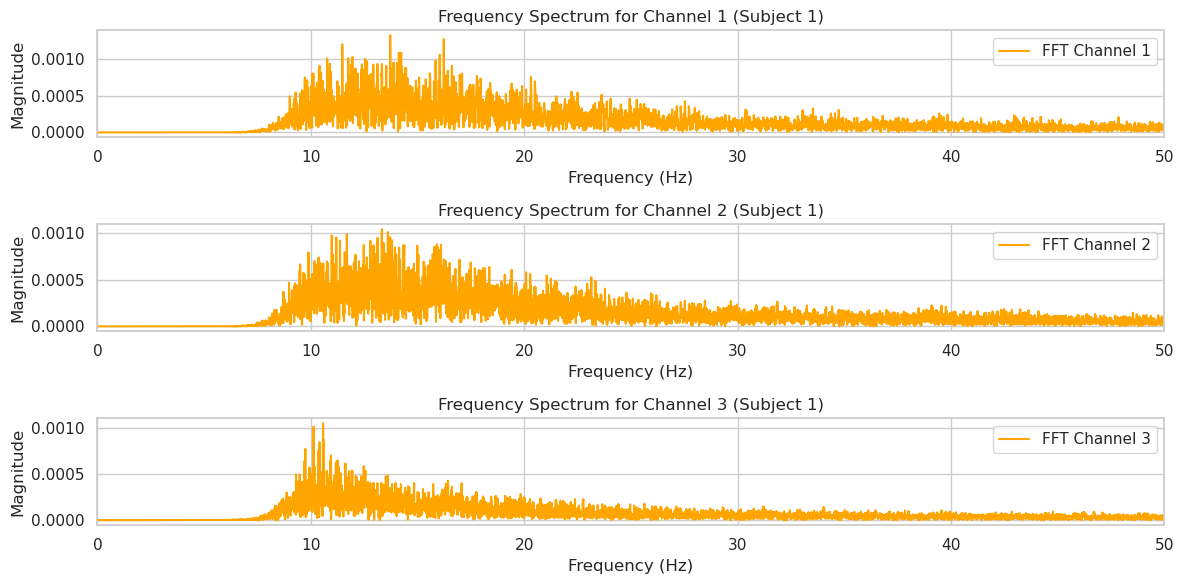

In [17]:
# Assume subject1_filtered is not empty and has at least 3 columns
num_channels = 3
channels_data = subject1_filtered.iloc[:, :num_channels].values  # shape: (N_samples, 3)

freq_list = []
mag_list = []

# Compute FFT for each channel
for i in range(num_channels):
    channel_data = channels_data[:, i]
    freq, fft_magnitude = apply_fft_to_signal(channel_data, sample_rate)
    freq_list.append(freq)
    mag_list.append(fft_magnitude)

# Now plot each channel
plt.figure(figsize=(12, 6))
for i in range(num_channels):
    plt.subplot(3, 1, i+1)
    plt.plot(freq_list[i], mag_list[i], label=f"FFT Channel {i+1}", color='orange')
    plt.title(f"Frequency Spectrum for Channel {i+1} (Subject 1)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 50)
    plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Compute FFT for each subject
subject1_fft = compute_fft_for_subject(subject1_filtered, sample_rate=100)
subject2_fft = compute_fft_for_subject(subject2_filtered, sample_rate=100)
subject3_fft = compute_fft_for_subject(subject3_filtered, sample_rate=100)

# Check the shapes to ensure alignment with time-domain data
print("subject1_filtered shape:", subject1_filtered.shape)
print("subject1_fft shape:", subject1_fft.shape)


subject1_filtered shape: (10333, 11)
subject1_fft shape: (5167, 11)


In [19]:
def combine_all_channels(subject_filtered_df, subject_fft_df):
    """
    Combines time-domain and frequency-domain features for all channels for each label (Stimulus).
    Assumes subject_filtered_df contains time-domain data and subject_fft_df contains frequency-domain data.
    """
    # Ensure 'Stimulus' is present in both DataFrames
    if 'Stimulus' not in subject_filtered_df.columns or 'Stimulus' not in subject_fft_df.columns:
        raise ValueError("Both DataFrames must contain a 'Stimulus' column.")
    
    # Group and aggregate frequency-domain data by Stimulus
    freq_grouped = subject_fft_df.groupby('Stimulus').mean().reset_index()  # Aggregate over frequency bins for simplicity
    
    # Merge time-domain and frequency-domain data on Stimulus
    combined_df = subject_filtered_df.merge(freq_grouped, on='Stimulus', how='inner')
    
    return combined_df

# Combine time and frequency data for each subject
subject1_combined = combine_all_channels(subject1_filtered, subject1_fft)
subject2_combined = combine_all_channels(subject2_filtered, subject2_fft)
subject3_combined = combine_all_channels(subject3_filtered, subject3_fft)

# Verify the combined DataFrame
print("Combined DataFrame for Subject 1:")
print(subject1_combined.info())


Combined DataFrame for Subject 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10333 entries, 0 to 10332
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Channel_1_x   10333 non-null  float64
 1   Channel_2_x   10333 non-null  float64
 2   Channel_3_x   10333 non-null  float64
 3   Channel_4_x   10333 non-null  float64
 4   Channel_5_x   10333 non-null  float64
 5   Channel_6_x   10333 non-null  float64
 6   Channel_7_x   10333 non-null  float64
 7   Channel_8_x   10333 non-null  float64
 8   Channel_9_x   10333 non-null  float64
 9   Channel_10_x  10333 non-null  float64
 10  Stimulus      10333 non-null  uint8  
 11  Channel_1_y   10333 non-null  float64
 12  Channel_2_y   10333 non-null  float64
 13  Channel_3_y   10333 non-null  float64
 14  Channel_4_y   10333 non-null  float64
 15  Channel_5_y   10333 non-null  float64
 16  Channel_6_y   10333 non-null  float64
 17  Channel_7_y   10333 non-null  float

In [20]:
subject2_combined.head()

,Channel_1_x,Channel_2_x,Channel_3_x,Channel_4_x,Channel_5_x,Channel_6_x,Channel_7_x,Channel_8_x,Channel_9_x,Channel_10_x,...,Channel_1_y,Channel_2_y,Channel_3_y,Channel_4_y,Channel_5_y,Channel_6_y,Channel_7_y,Channel_8_y,Channel_9_y,Channel_10_y
0,0.000028,0.000496,-0.000202,0.000455,0.000587,-0.001119,0.000388,0.000244,0.000713,0.000138,...,0.00023,0.000223,0.000327,0.000152,0.000083,0.00008,0.000092,0.000232,0.000397,0.000171
1,0.001691,-0.015456,-0.037591,-0.006545,0.006429,0.012520,-0.009923,-0.022501,0.015802,0.012414,...,0.00023,0.000223,0.000327,0.000152,0.000083,0.00008,0.000092,0.000232,0.000397,0.000171
2,0.006731,-0.021524,-0.039330,-0.010219,0.011377,0.012237,-0.014703,-0.022217,0.018000,0.012518,...,0.00023,0.000223,0.000327,0.000152,0.000083,0.00008,0.000092,0.000232,0.000397,0.000171
3,0.003387,-0.016514,-0.026260,-0.009502,0.011668,0.005065,-0.013893,-0.016683,0.010590,0.005234,...,0.00023,0.000223,0.000327,0.000152,0.000083,0.00008,0.000092,0.000232,0.000397,0.000171
4,-0.002141,-0.003860,-0.004302,-0.004954,0.009153,-0.002611,-0.008367,-0.005664,-0.000823,-0.003709,...,0.00023,0.000223,0.000327,0.000152,0.000083,0.00008,0.000092,0.000232,0.000397,0.000171


In [21]:
# Check if there are any NaN values in the DataFrame
if subject2_combined.isnull().values.any():
    print("NaN values found in subject2_combined.")
    
    # Print the total number of NaN values
    total_nans = subject2_combined.isnull().sum().sum()
    print(f"Total NaN values: {total_nans}")
    
    # Optional: Display columns with NaN values and their counts
    nans_per_column = subject2_combined.isnull().sum()
    print("Columns with NaN values:")
    print(nans_per_column[nans_per_column > 0])
else:
    print("No NaN values found in subject2_combined.")


No NaN values found in subject2_combined.


In [22]:
# #running the model for the combined data in the wrong way
# # ### Combined Domain ###
# print("Subject 1 - Combined Domain Results:")

# y = subject1_combined['Stimulus'].values
# X = subject1_combined.drop(columns=['Stimulus']).values

# print("  Evaluating combined domain with all channels (time and frequency)...")
# best_combined_k, best_combined_acc = leave_one_trial_out_knn(X, y, scale_features=True, verbose=True)

# record_results("Combined Domain", "All Channels", best_combined_k, best_combined_acc)
# print(f"-> Combined Domain: Best K={best_combined_k}, Accuracy={best_combined_acc*100:.2f}%\n")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def leave_one_trial_out_knn(X, y, k_values=range(1, 3), scale_features=True, verbose=False):
    """
    Perform leave-one-trial-out CV for a given set of features X and labels y.
    """
    best_k = None
    best_acc = 0.0
    n_trials = len(y)
    
    if verbose:
        print(f"    Starting leave-one-trial-out CV: {n_trials} trials, k_values={list(k_values)}")
    
    for k in k_values:
        correct = 0
        if verbose:
            print(f"    Trying K={k}")
            
        for i in range(n_trials):
            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i)
            X_test = X[i].reshape(1, -1)
            y_test = y[i]
            
            # Scale features if requested
            if scale_features:
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
            
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            if y_pred[0] == y_test:
                correct += 1
        
        accuracy = correct / n_trials
        if verbose:
            print(f"    K={k}: Accuracy={accuracy*100:.2f}%")
        
        if accuracy > best_acc:
            best_acc = accuracy
            best_k = k
    
    if verbose:
        print(f"    Best K={best_k} with Accuracy={best_acc*100:.2f}%\n")
    return best_k, best_acc

def knn_evaluation(subject_number):
    """
    Perform KNN evaluation for a specific subject.
    """
    # Dynamically set variables for the subject
    subject_filtered = globals()[f"subject{subject_number}_filtered"]
    subject_fft = globals()[f"subject{subject_number}_fft"]
    
    # Initialize storage for results
    results = []

    def record_results(domain, channel, best_k, best_acc):
        """
        Record results for each channel/domain combination.
        """
        results.append({
            "Domain": domain,
            "Channel": channel,
            "Best K": best_k,
            "Accuracy (%)": best_acc * 100
        })

    print(f"Starting KNN evaluation for Subject {subject_number}...\n")

    # ### Time Domain ###
    print(f"Subject {subject_number} - Time Domain Results:")
    y = subject_filtered['Stimulus'].values
    time_channels = [col for col in subject_filtered.columns if col.startswith('Channel_')]

    best_time_acc = 0
    best_time_channel = None
    best_time_k = None

    for ch in time_channels:
        print(f"  Evaluating Time-Domain Channel: {ch}")
        X = subject_filtered[[ch]].values
        best_k, best_acc = leave_one_trial_out_knn(X, y, scale_features=True, verbose=True)
        
        print(f"  Channel: {ch}, Best K={best_k}, Accuracy={best_acc*100:.2f}%")
        record_results("Time Domain", ch, best_k, best_acc)
        
        if best_acc > best_time_acc:
            best_time_acc = best_acc
            best_time_channel = ch
            best_time_k = best_k

    # Evaluate all time-domain channels combined
    print(f"\n  Evaluating All Time-Domain Channels Combined...")
    X = subject_filtered[time_channels].values
    best_combined_time_k, best_combined_time_acc = leave_one_trial_out_knn(X, y, scale_features=True, verbose=True)
    print(f"  Combined Time Domain: Best K={best_combined_time_k}, Accuracy={best_combined_time_acc*100:.2f}%")
    record_results("Time Domain", "All Channels Combined", best_combined_time_k, best_combined_time_acc)

    print(f"-> Best time-domain channel: {best_time_channel} with K={best_time_k}, Accuracy={best_time_acc*100:.2f}%\n")


    # ### Frequency Domain ###
    print(f"Subject {subject_number} - Frequency Domain Results:")

    y = subject_fft['Stimulus'].values
    freq_channels = [col for col in subject_fft.columns if col.startswith('Channel_')]

    best_freq_acc = 0
    best_freq_channel = None
    best_freq_k = None

    for ch in freq_channels:
        print(f"  Evaluating Frequency-Domain Channel: {ch}")
        X = subject_fft[[ch]].values
        best_k, best_acc = leave_one_trial_out_knn(X, y, scale_features=True, verbose=True)
        
        print(f"  Channel: {ch}, Best K={best_k}, Accuracy={best_acc*100:.2f}%")
        record_results("Frequency Domain", ch, best_k, best_acc)
        
        if best_acc > best_freq_acc:
            best_freq_acc = best_acc
            best_freq_channel = ch
            best_freq_k = best_k

    # Evaluate all frequency-domain channels combined
    print(f"\n  Evaluating All Frequency-Domain Channels Combined...")
    X = subject_fft[freq_channels].values
    best_combined_freq_k, best_combined_freq_acc = leave_one_trial_out_knn(X, y, scale_features=True, verbose=True)
    print(f"  Combined Frequency Domain: Best K={best_combined_freq_k}, Accuracy={best_combined_freq_acc*100:.2f}%")
    record_results("Frequency Domain", "All Channels Combined", best_combined_freq_k, best_combined_freq_acc)

    print(f"-> Best frequency-domain channel: {best_freq_channel} with K={best_freq_k}, Accuracy={best_freq_acc*100:.2f}%\n")


    # ### Save Results ###
    results_df = pd.DataFrame(results)
    filename = f"subject{subject_number}_knn_results.csv"
    results_df.to_csv(filename, index=False)

    # Print best results summary
    print("\nSummary of Best Results:")
    print(f"  Time Domain: Best Channel={best_time_channel}, Best K={best_time_k}, Accuracy={best_time_acc*100:.2f}%")
    print(f"  Combined Time Domain: Best K={best_combined_time_k}, Accuracy={best_combined_time_acc*100:.2f}%")
    print(f"  Frequency Domain: Best Channel={best_freq_channel}, Best K={best_freq_k}, Accuracy={best_freq_acc*100:.2f}%")
    print(f"  Combined Frequency Domain: Best K={best_combined_freq_k}, Accuracy={best_combined_freq_acc*100:.2f}%")
    print(f"\nKNN evaluation completed for Subject {subject_number}. Results saved to '{filename}'.")



In [24]:
import faiss
print(f"Number of GPUs available: {faiss.get_num_gpus()}")


Number of GPUs available: 0


In [25]:
# Example usage: Specify the subject number and run the evaluation
subject_number = 1  # Change this to 1, 2, or 3
knn_evaluation(subject_number)

Starting KNN evaluation for Subject 1...

Subject 1 - Time Domain Results:
  Evaluating Time-Domain Channel: Channel_1
    Starting leave-one-trial-out CV: 10333 trials, k_values=[1, 2]
    Trying K=1


AttributeError: module 'faiss' has no attribute 'index_cpu_to_gpu'